In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [24]:
#results/2jul2018/
burn_vc = pd.read_csv('../trainset_1_act_burnup_validation_curve.csv')
enri_vc = pd.read_csv('../trainset_1_act_enrichment_validation_curve.csv')
cool_vc = pd.read_csv('../trainset_1_act_cooling_validation_curve.csv')
rxtr_vc = pd.read_csv('../trainset_1_act_reactor_validation_curve.csv')

In [27]:
burn_vc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_vc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_vc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_vc.loc[:, 'Parameter'] = 'Reactor Type'

# Training Set 1
## kNN
### Explained Variance/Accuracy

In [5]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn') & (burn_vc['ScoringMetric']=='explained_variance')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn') & (enri_vc['ScoringMetric']=='explained_variance')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn') & (cool_vc['ScoringMetric']=='explained_variance')]
knn_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='knn') & (rxtr_vc['ScoringMetric']=='accuracy')]

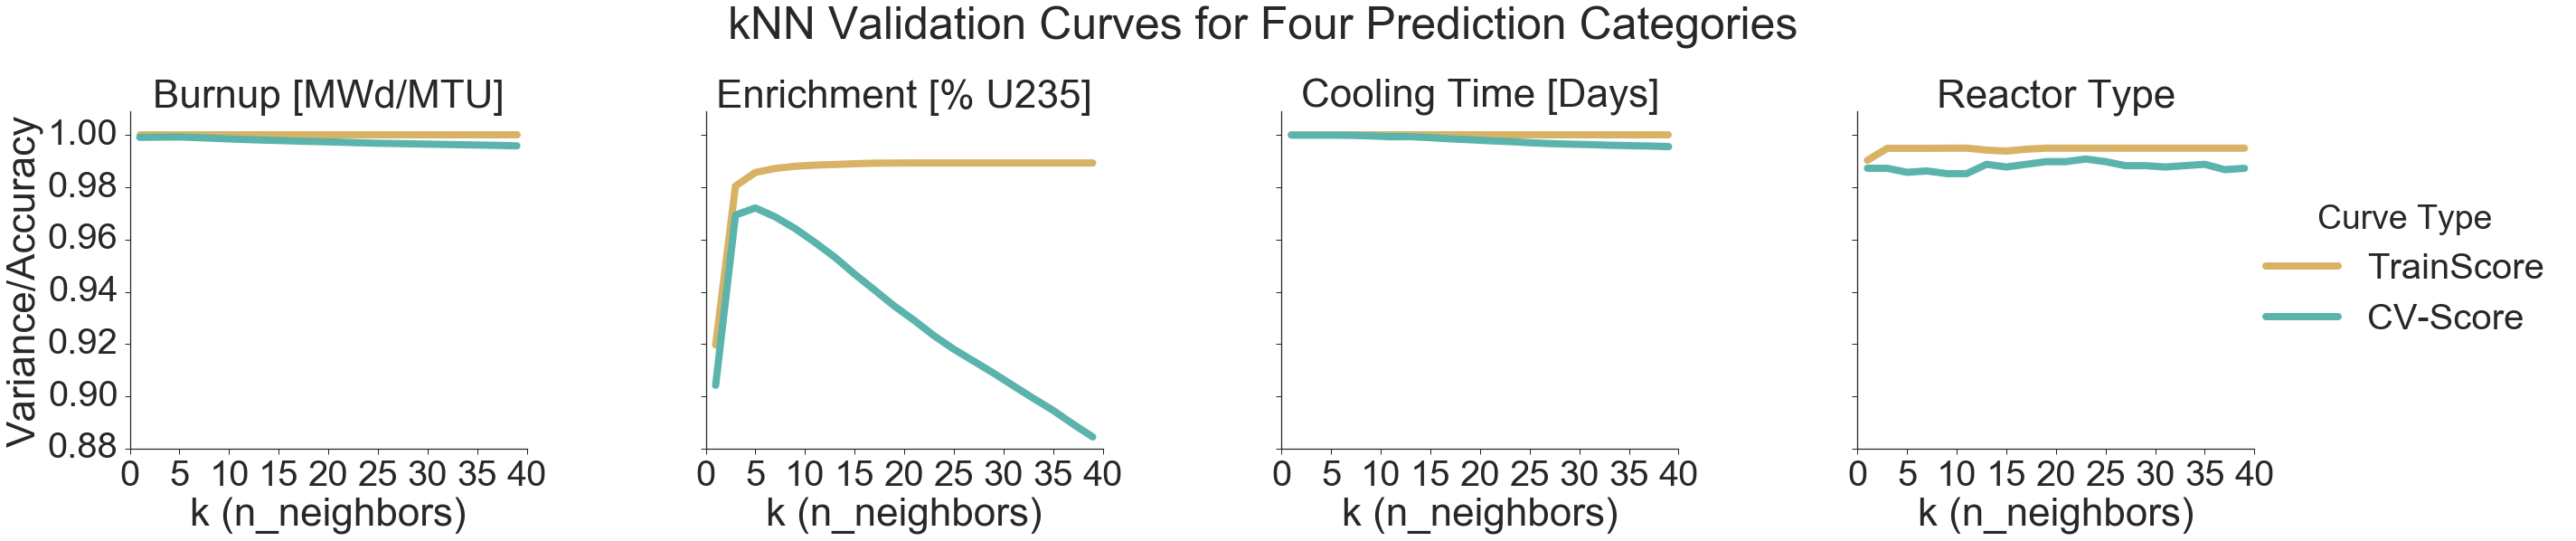

In [9]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Variance/Accuracy')
   .set(ylim=(0.88, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/1knn_act_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [11]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

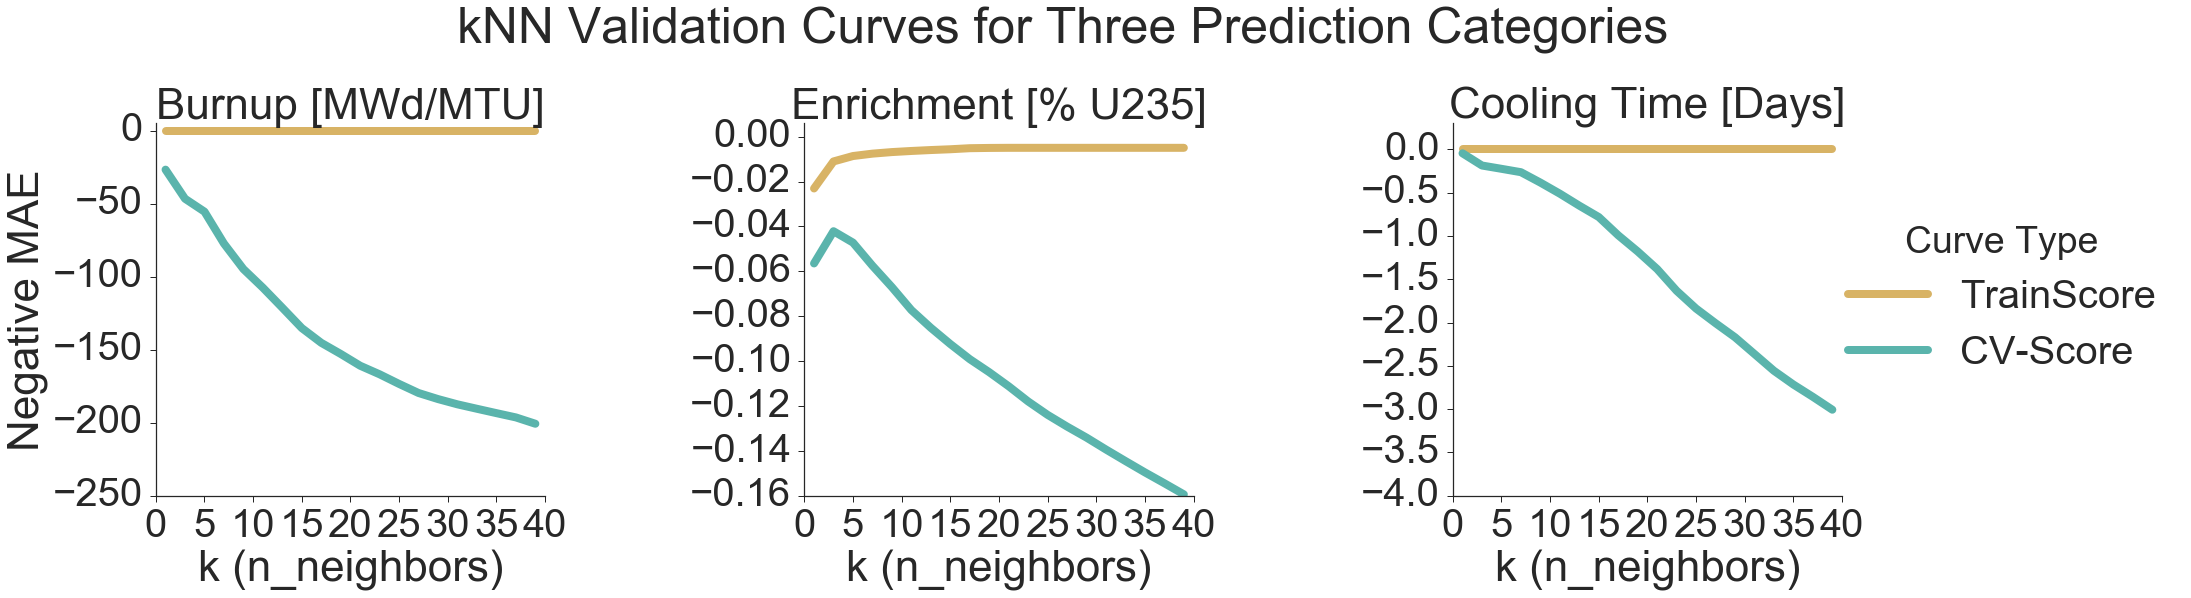

In [15]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Negative MAE')
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-250, 5)
vc.axes[0,1].set_ylim(-0.16, 0.006)
vc.axes[0,2].set_ylim(-4, 0.3)

vc.savefig('../results/2jul2018/graphs/1knn_act_validation_mae.png', bbox_inches='tight', transparent=True)

## Ridge
### Explained Variance/Accuracy

In [16]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='explained_variance')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='explained_variance')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='explained_variance')]
rr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='rr') & (rxtr_vc['ScoringMetric']=='accuracy')]

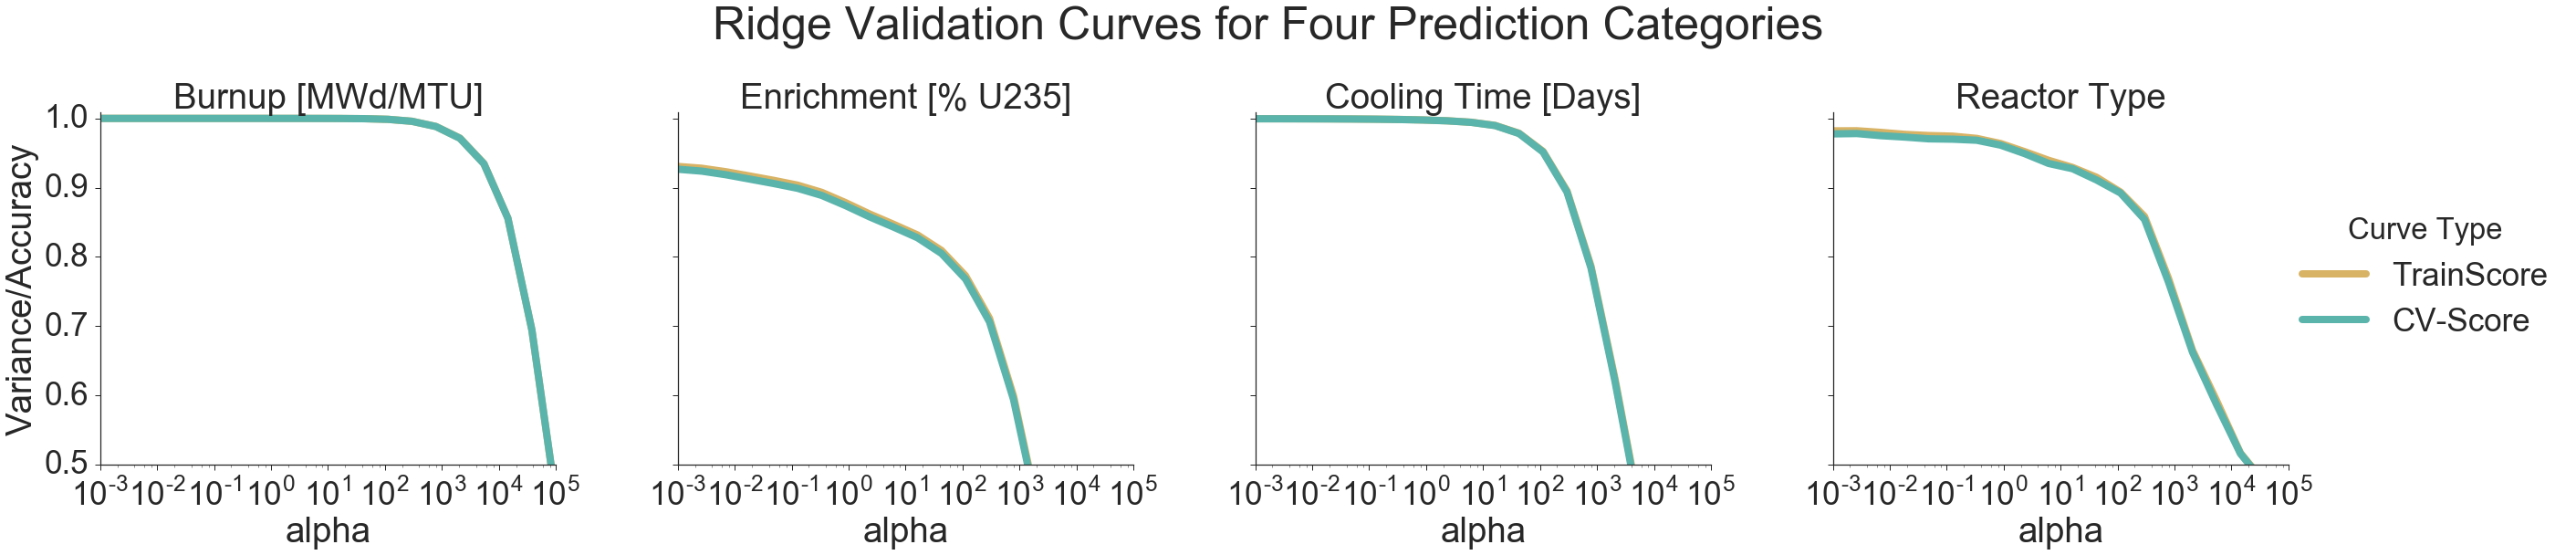

In [18]:
plt.clf()

sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('alpha', 'Variance/Accuracy')
   .set(xscale="log")
   .set(ylim=(0.5, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/1rr_act_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [19]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

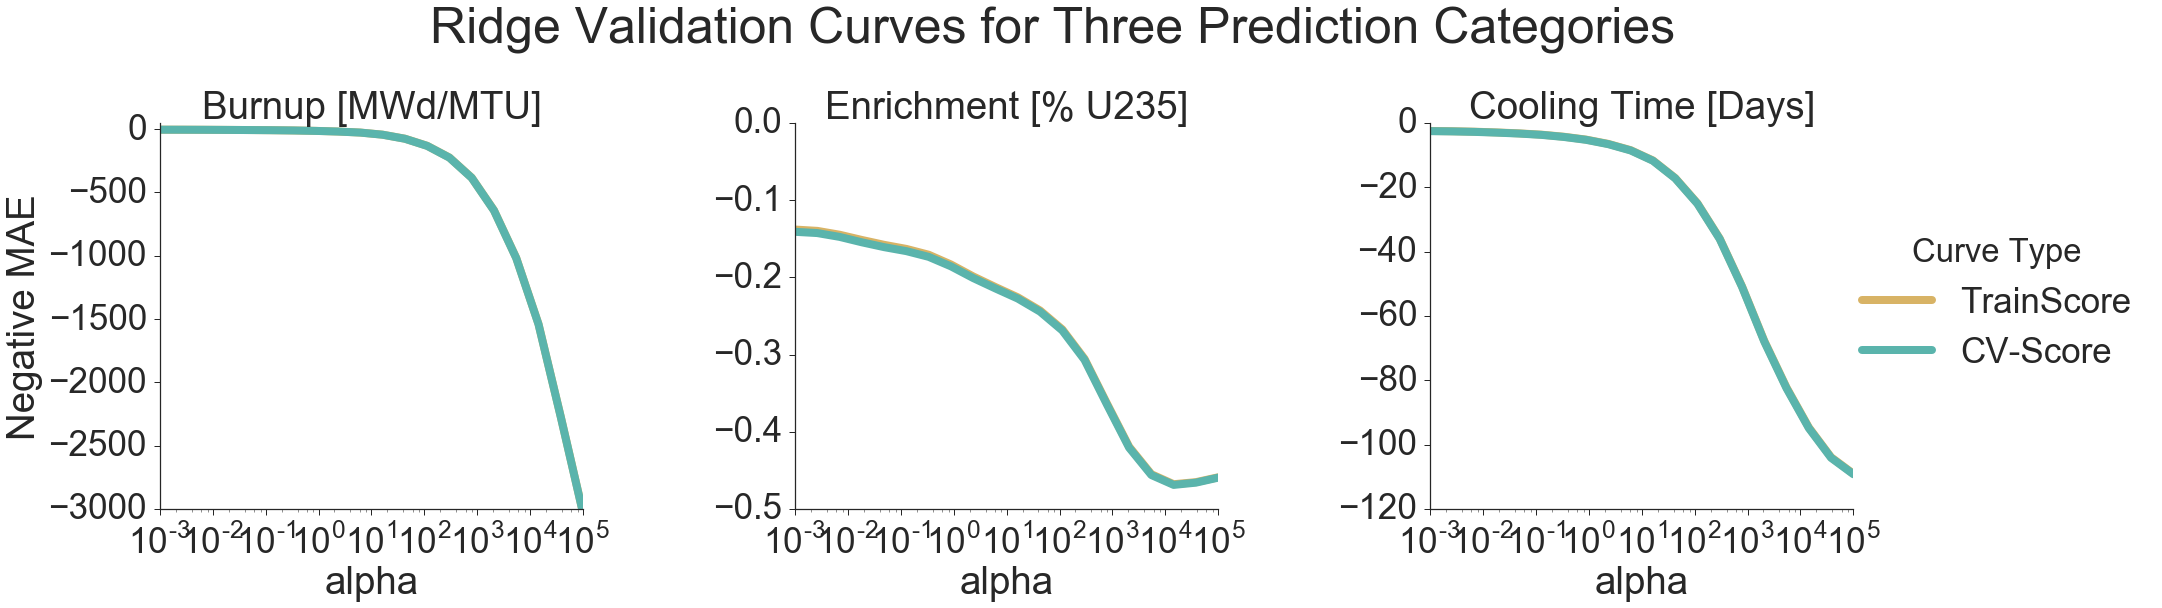

In [21]:
plt.clf()
sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('alpha', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-3000, 50)
vc.axes[0,1].set_ylim(-0.5, 0)
vc.axes[0,2].set_ylim(-120, 0)

vc.savefig('../results/2jul2018/graphs/1rr_act_validation_mae.png', bbox_inches='tight', transparent=True)

## SVR
### Explained Variance/Accuracy

In [28]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='explained_variance')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='explained_variance')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='explained_variance')]
svr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='svr') & (rxtr_vc['ScoringMetric']=='accuracy')]

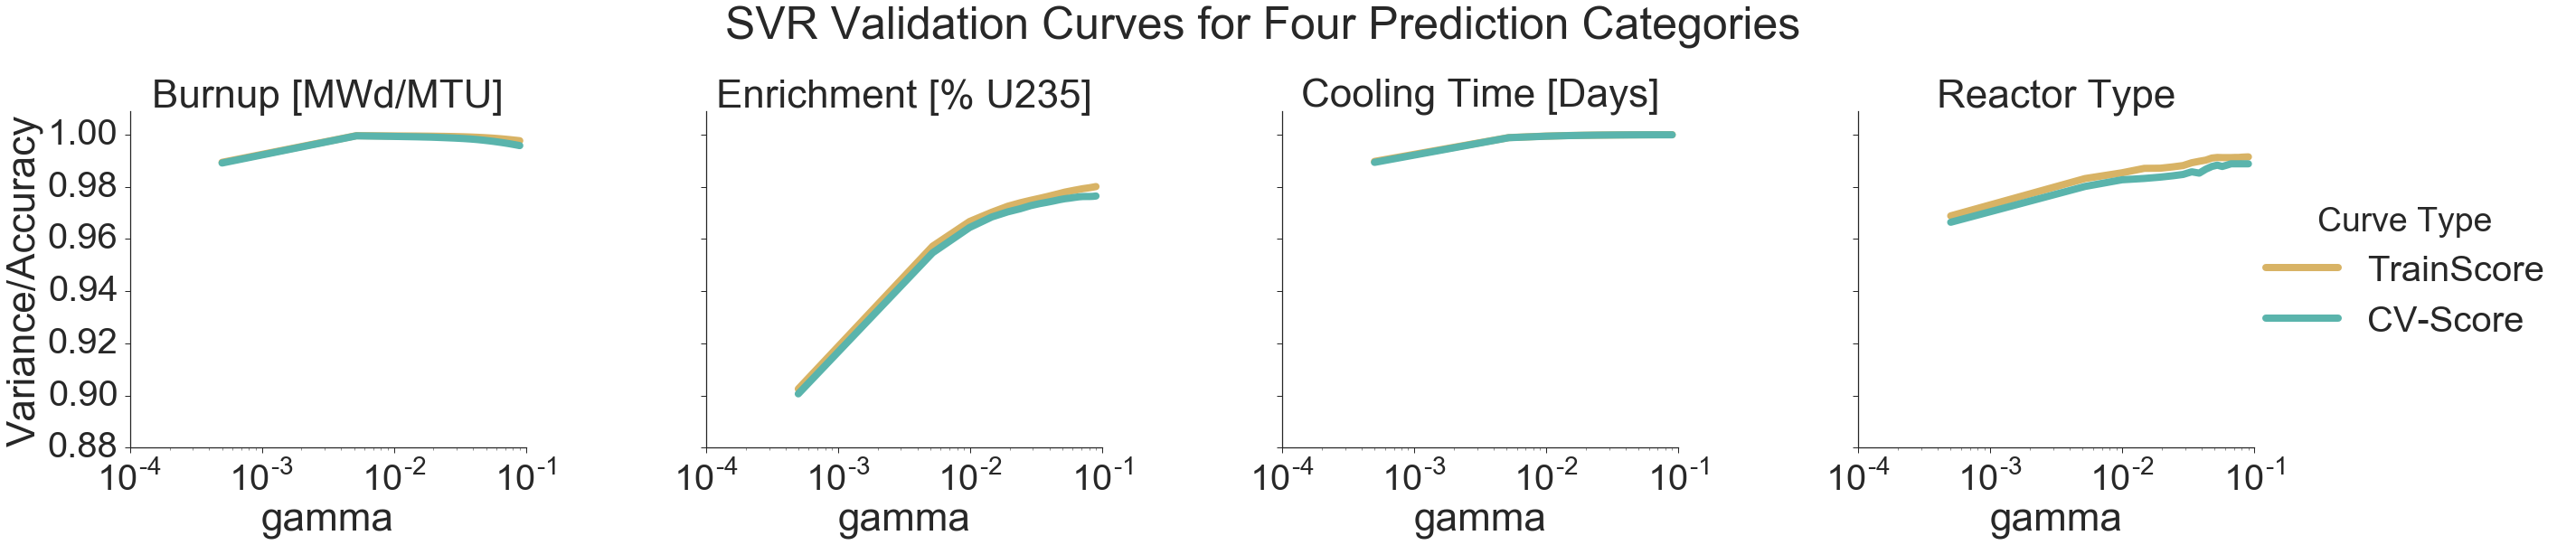

In [31]:
plt.clf()

sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('gamma', 'Variance/Accuracy')
   .set(xscale="log")
   .set(ylim=(0.88, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/1svr_act_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [32]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

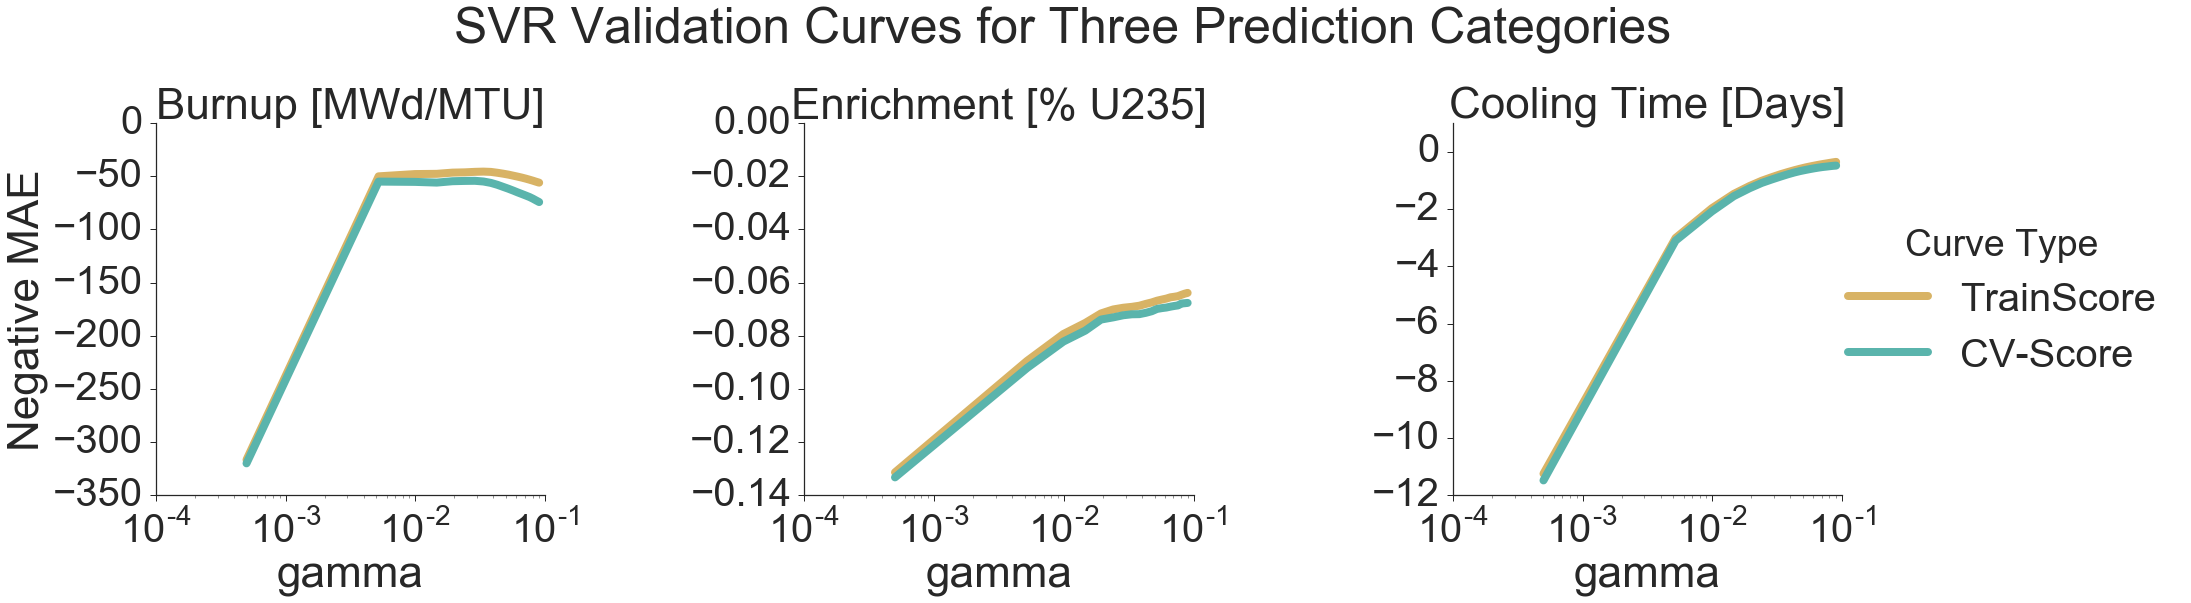

In [34]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('gamma', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-350, 0)
vc.axes[0,1].set_ylim(-0.14, 0)
vc.axes[0,2].set_ylim(-12, 1)

vc.savefig('../results/2jul2018/graphs/1svr_act_validation_mae.png', bbox_inches='tight', transparent=True)

# Training Set 2
## kNN
### Explained Variance/Accuracy

In [44]:
#results/2jul2018/
burn_vc = pd.read_csv('../trainset_2_act_burnup_validation_curve.csv')
enri_vc = pd.read_csv('../trainset_2_act_enrichment_validation_curve.csv')
cool_vc = pd.read_csv('../trainset_2_act_cooling_validation_curve.csv')
rxtr_vc = pd.read_csv('../trainset_2_act_reactor_validation_curve.csv')

In [45]:
burn_vc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_vc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_vc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_vc.loc[:, 'Parameter'] = 'Reactor Type'

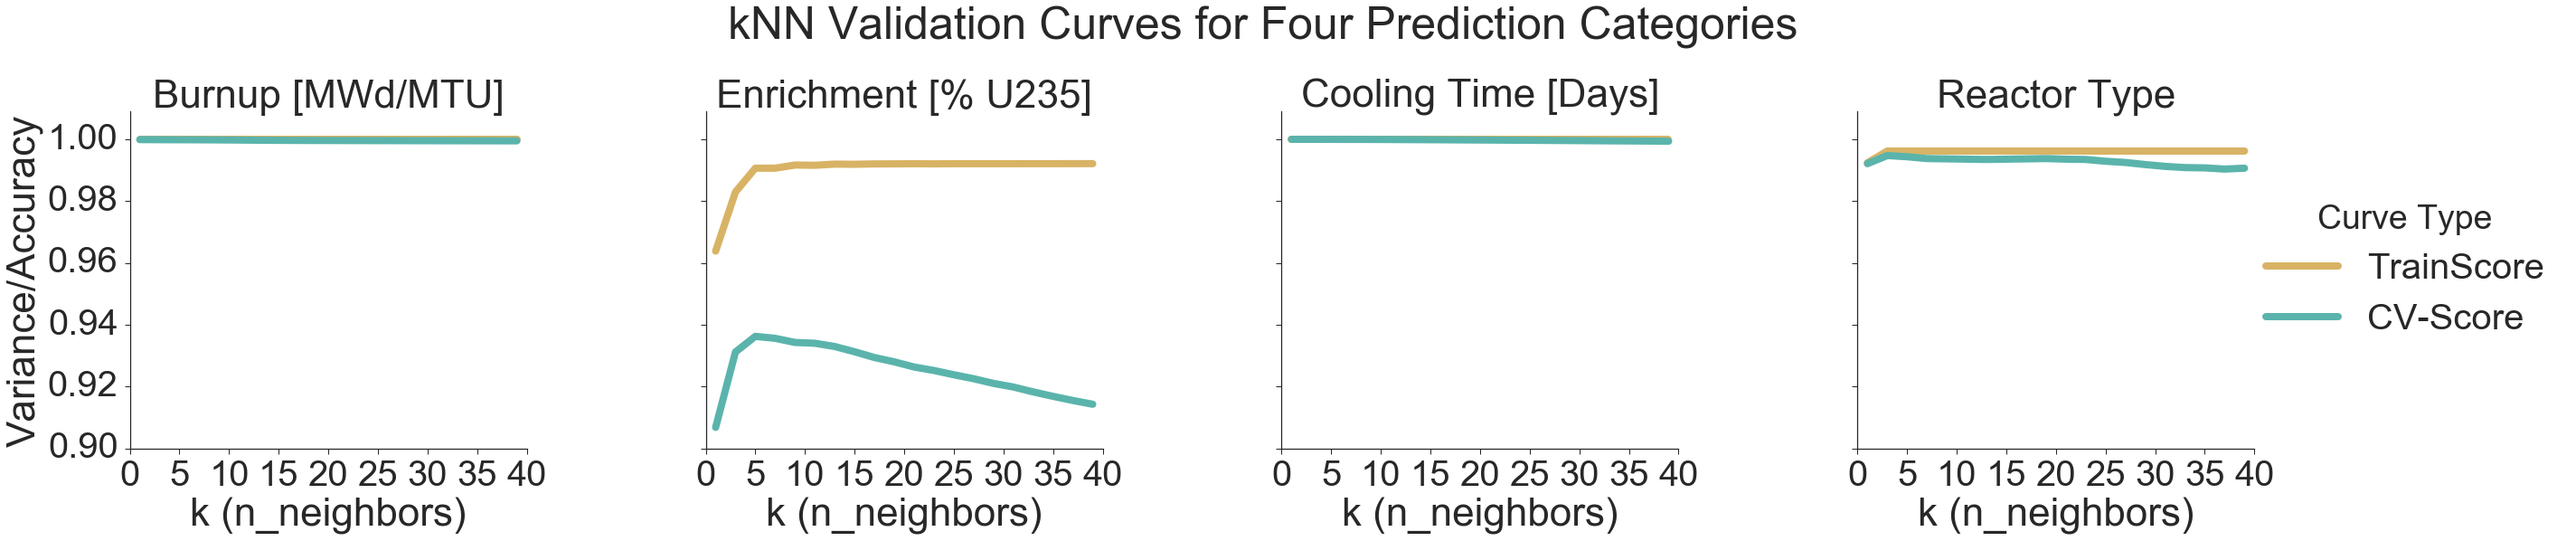

In [46]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn') & (burn_vc['ScoringMetric']=='explained_variance')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn') & (enri_vc['ScoringMetric']=='explained_variance')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn') & (cool_vc['ScoringMetric']=='explained_variance')]
knn_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='knn') & (rxtr_vc['ScoringMetric']=='accuracy')]

plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Variance/Accuracy')
   .set(ylim=(0.9, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/2knn_act_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

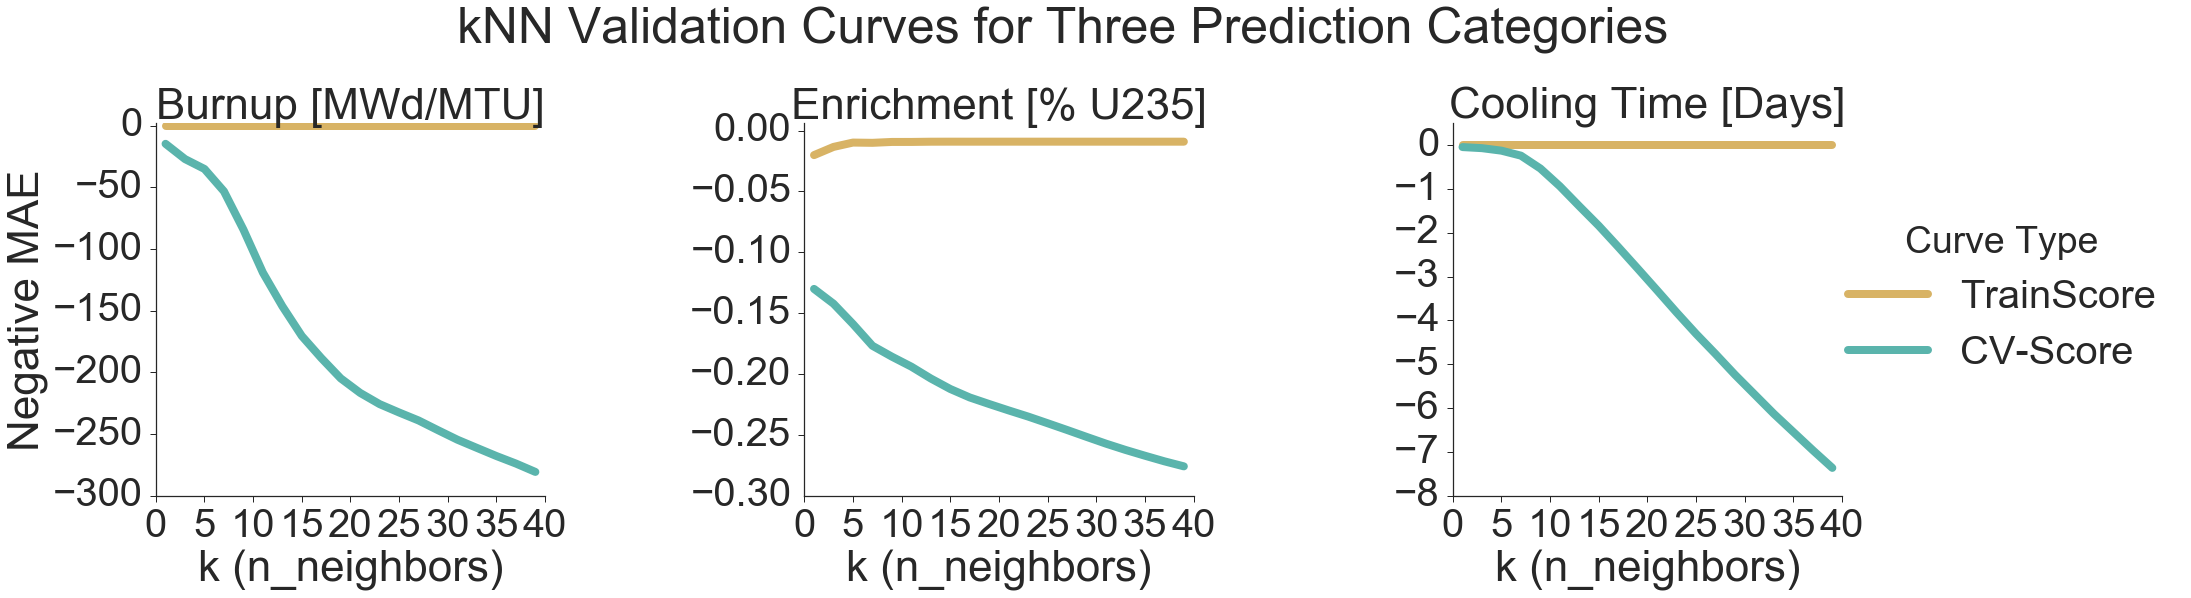

In [49]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Negative MAE')
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-300, 2)
vc.axes[0,1].set_ylim(-0.30, 0.006)
vc.axes[0,2].set_ylim(-8, 0.5)

vc.savefig('../results/2jul2018/graphs/2knn_act_validation_mae.png', bbox_inches='tight', transparent=True)

## Ridge
### Explained Variance/Accuracy

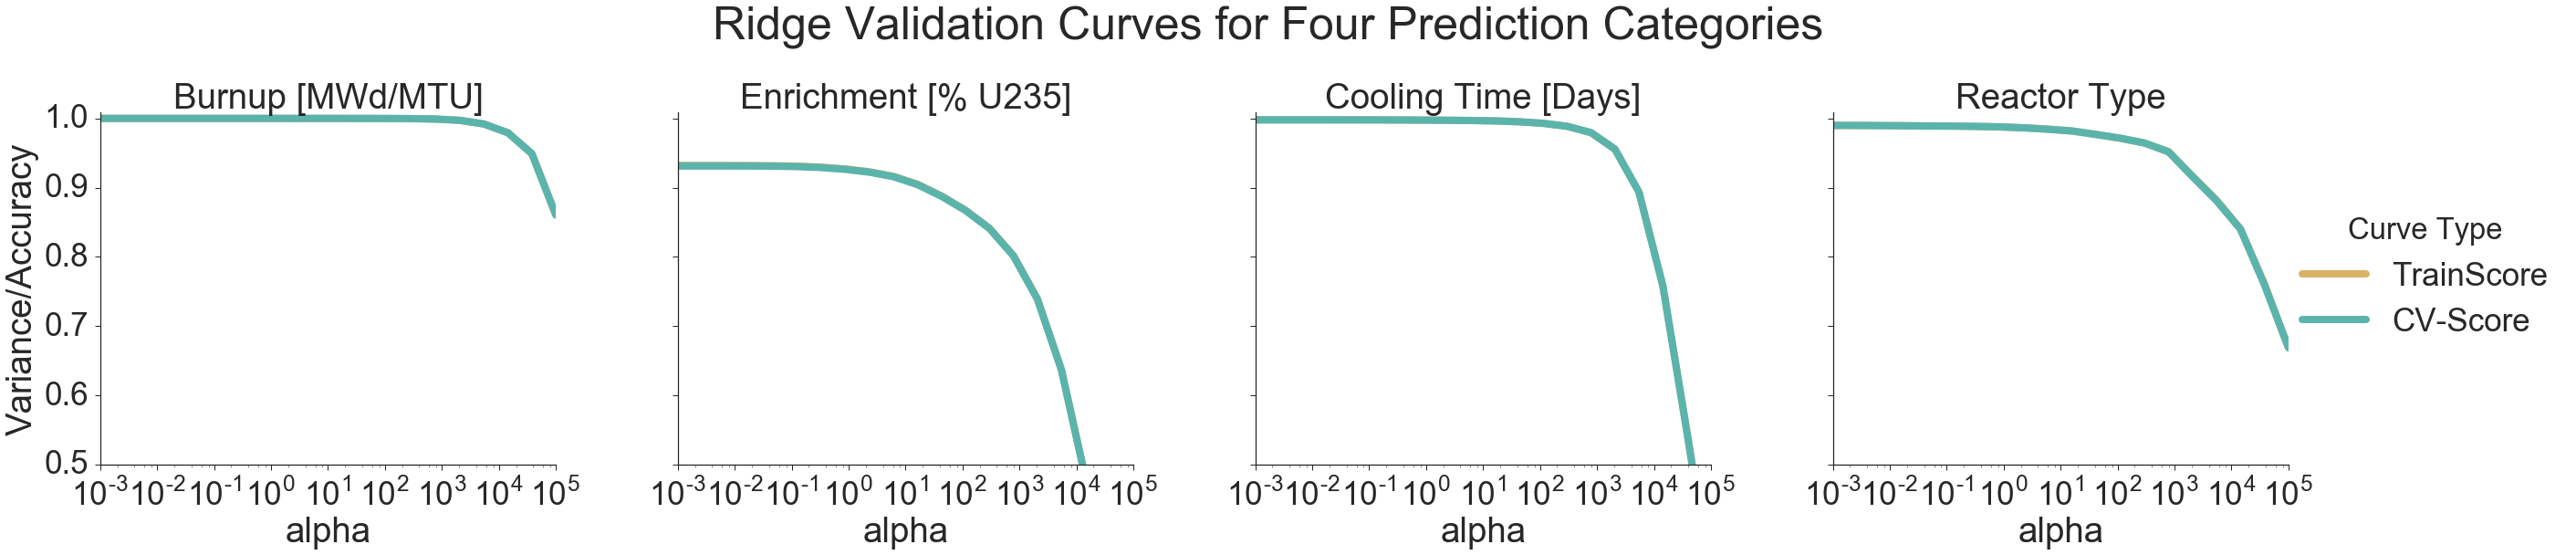

In [51]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='explained_variance')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='explained_variance')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='explained_variance')]
rr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='rr') & (rxtr_vc['ScoringMetric']=='accuracy')]

plt.clf()

sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('alpha', 'Variance/Accuracy')
   .set(xscale="log")
   .set(ylim=(0.5, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/2rr_act_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

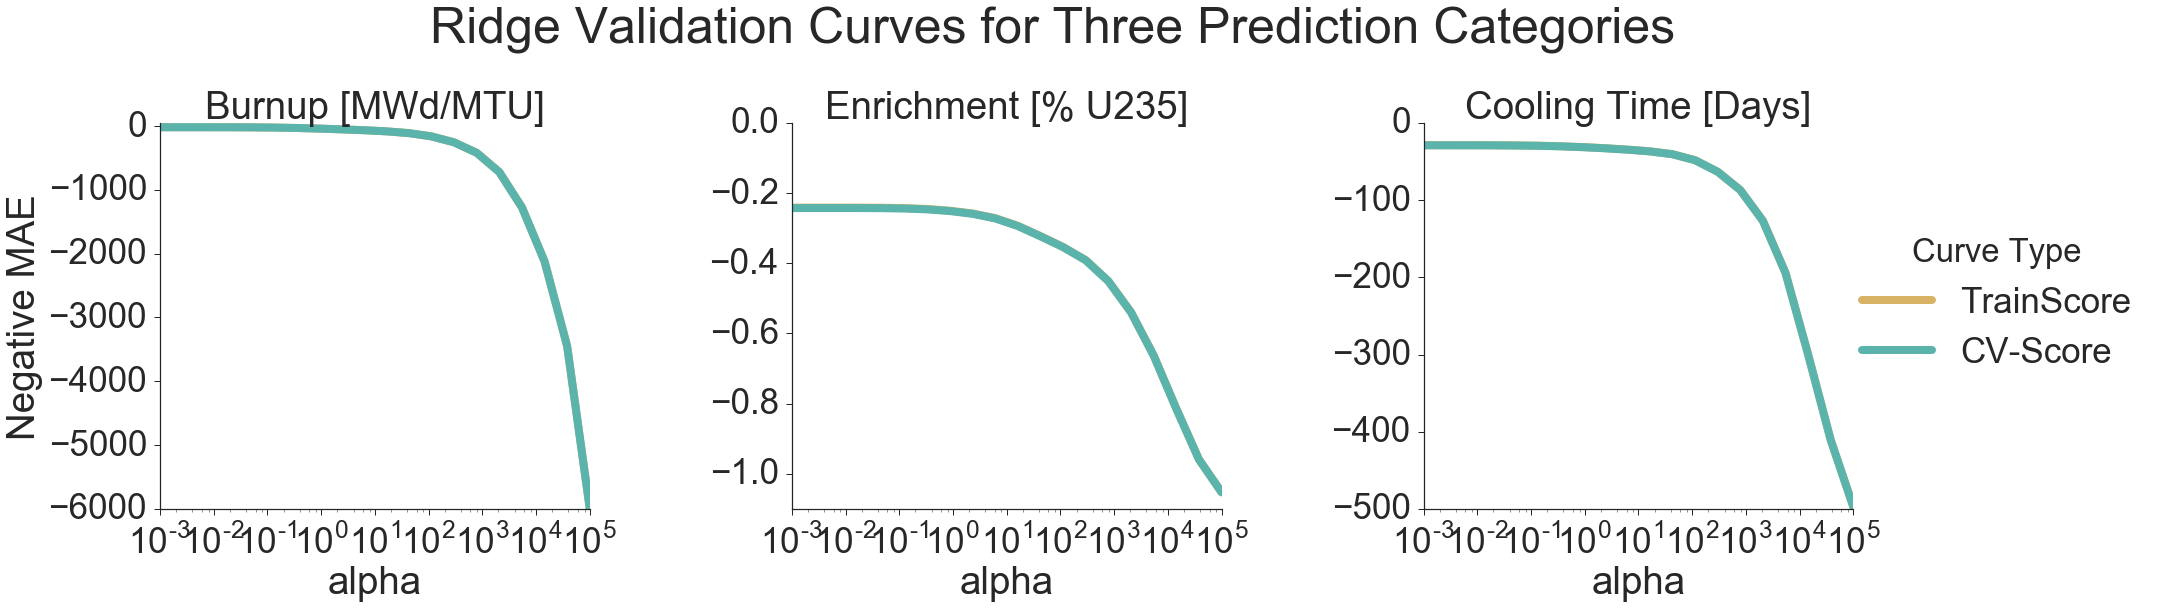

In [53]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

plt.clf()
sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('alpha', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-6000, 50)
vc.axes[0,1].set_ylim(-1.1, 0)
vc.axes[0,2].set_ylim(-500, 0)

vc.savefig('../results/2jul2018/graphs/2rr_act_validation_mae.png', bbox_inches='tight', transparent=True)

## SVR
### Explained Variance/Accuracy

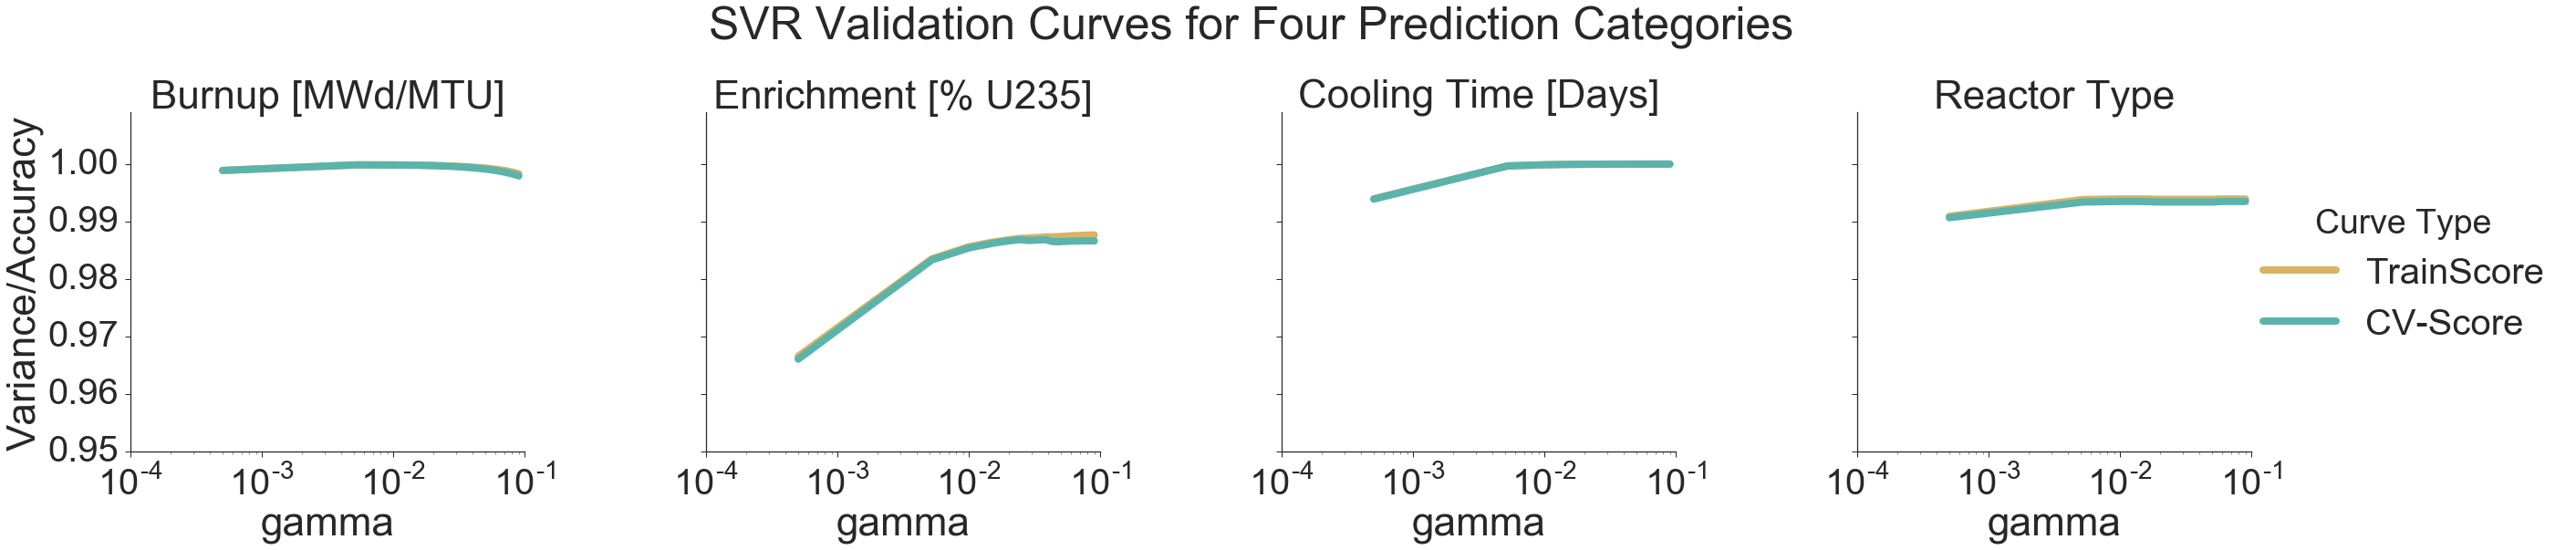

In [55]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='explained_variance')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='explained_variance')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='explained_variance')]
svr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='svr') & (rxtr_vc['ScoringMetric']=='accuracy')]

plt.clf()

sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('gamma', 'Variance/Accuracy')
   .set(xscale="log")
   .set(ylim=(0.95, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/2svr_act_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

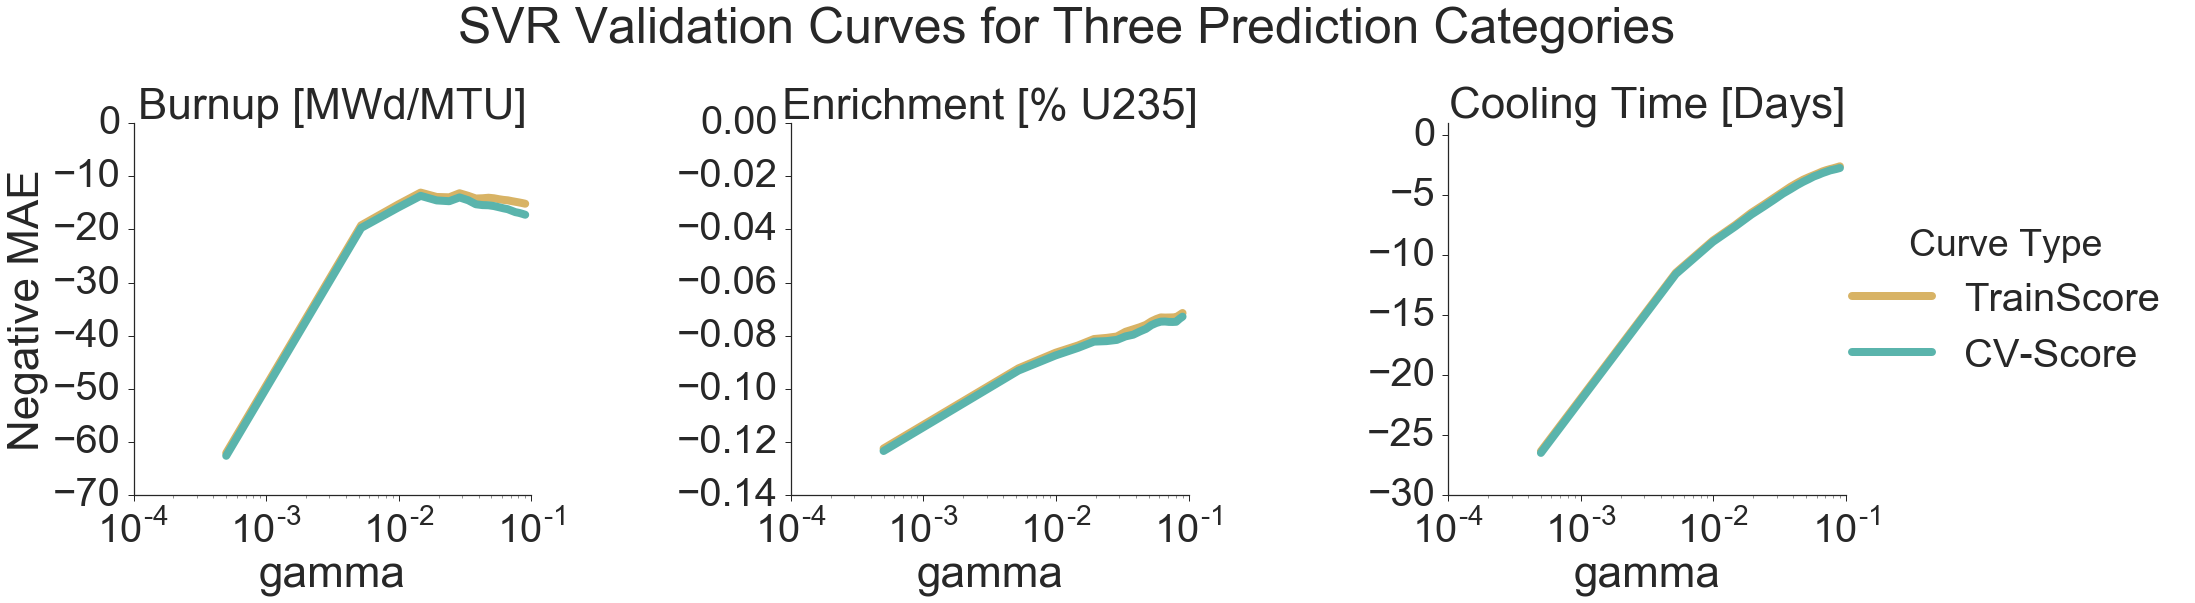

In [116]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('gamma', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-70, 0)
vc.axes[0,1].set_ylim(-0.14, 0)
vc.axes[0,2].set_ylim(-30, 1)

vc.savefig('../results/2jul2018/graphs/2svr_act_validation_mae.png', bbox_inches='tight', transparent=True)